In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')


stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
Date                   314 non-null object
Infosys                314 non-null int64
Indian Hotel           314 non-null int64
Mahindra & Mahindra    314 non-null int64
Axis Bank              314 non-null int64
SAIL                   314 non-null int64
Shree Cement           314 non-null int64
Sun Pharma             314 non-null int64
Jindal Steel           314 non-null int64
Idea Vodafone          314 non-null int64
Jet Airways            314 non-null int64
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [4]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [5]:
stock_prices.describe()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


In [6]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank',
       'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways'],
      dtype='object')

In [7]:
col=['Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank',
       'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways']

# Q1 :Draw Stock Price Chart for any 2 variables

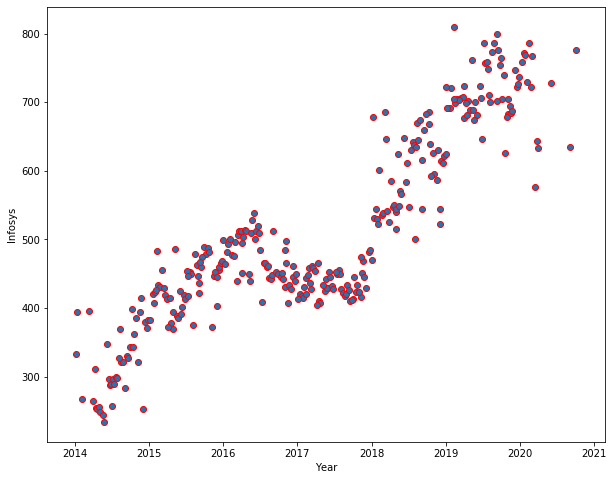

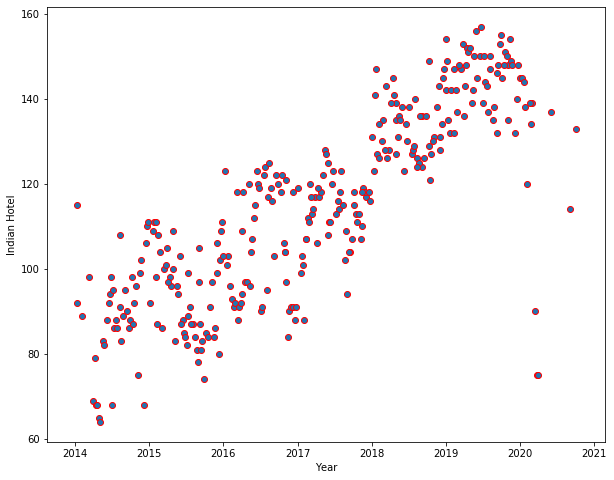

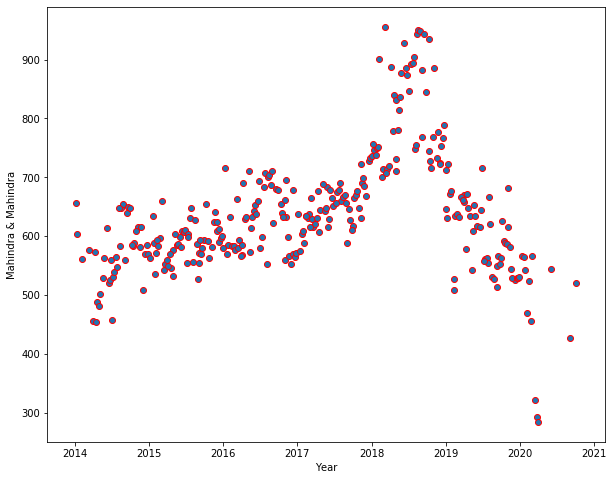

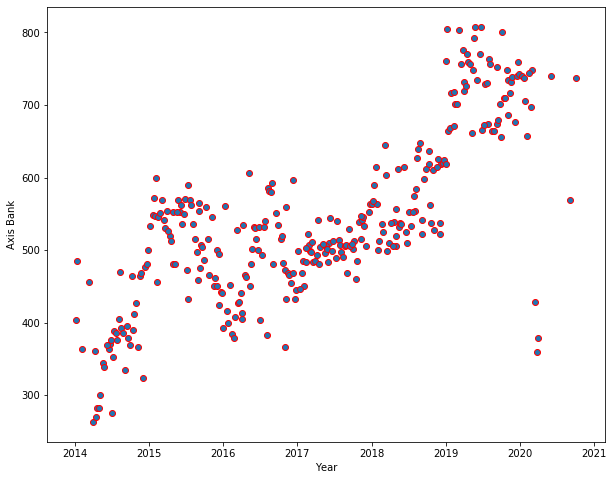

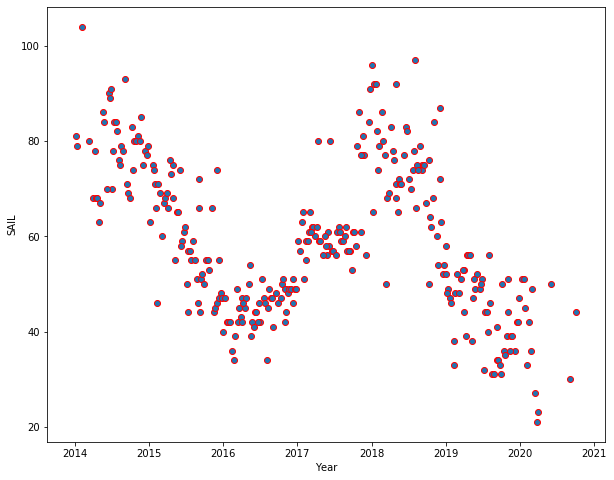

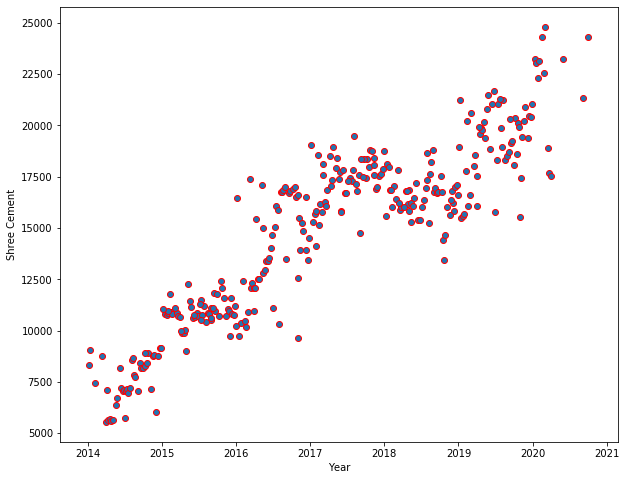

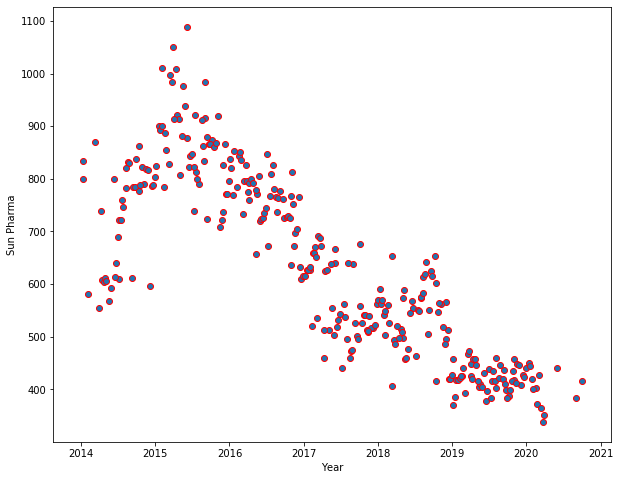

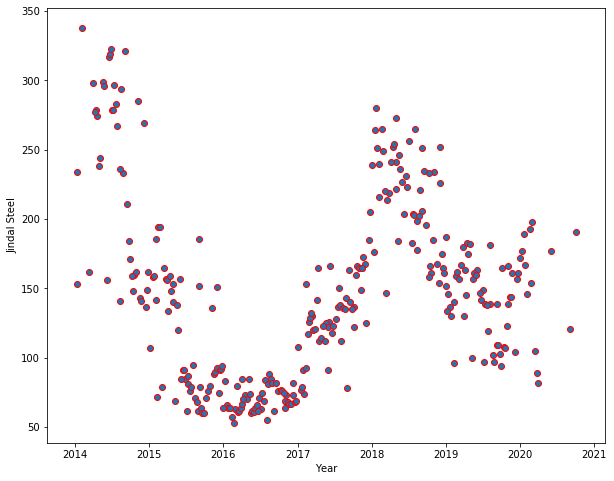

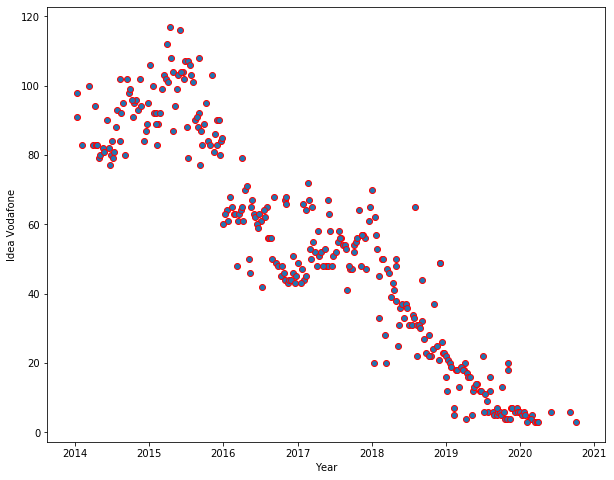

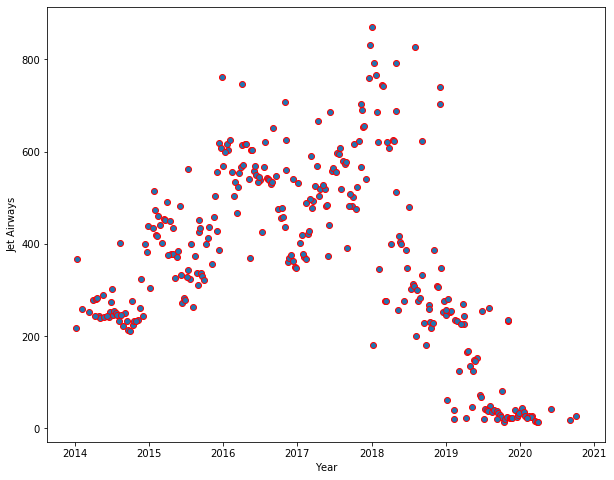

In [8]:
for i in range(len(col)):
    plt.figure(figsize = (10, 8))
    stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
    plt.scatter(stock_prices['dates'], stock_prices[col[i]], edgecolors='r')
    plt.xlabel('Year')
    plt.ylabel(col[i])
    

    plt.show()


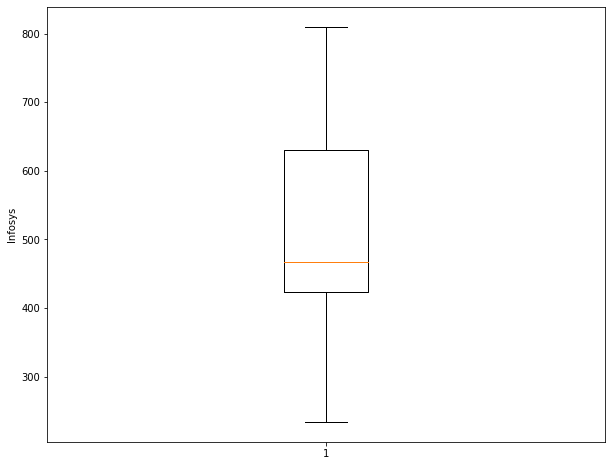

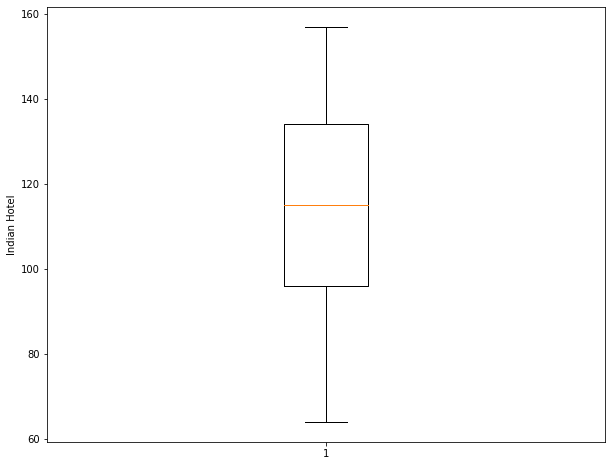

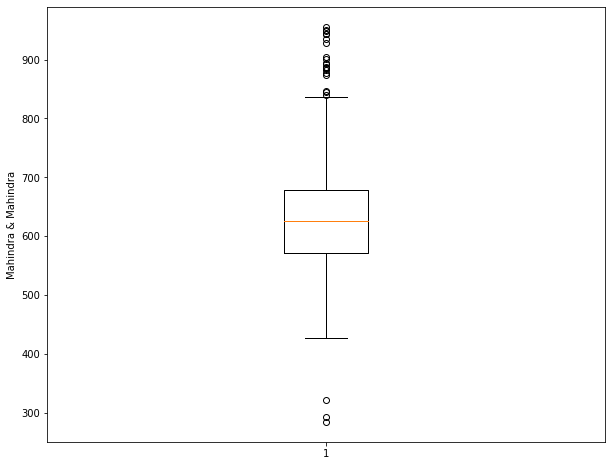

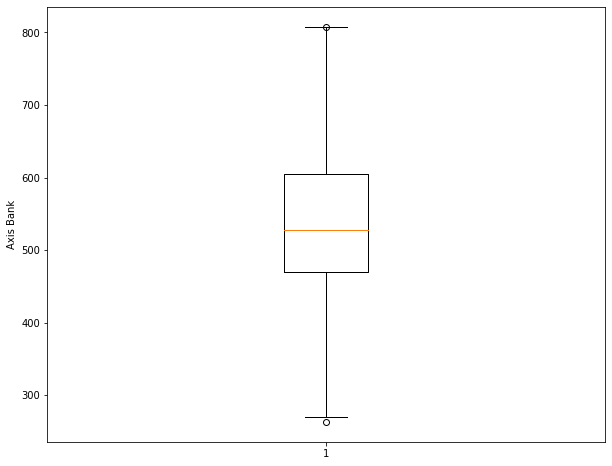

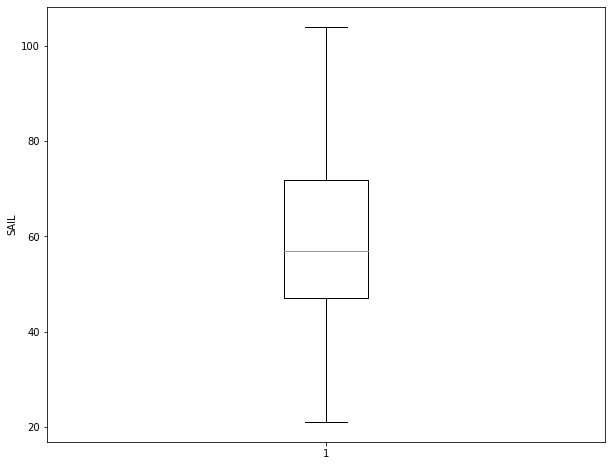

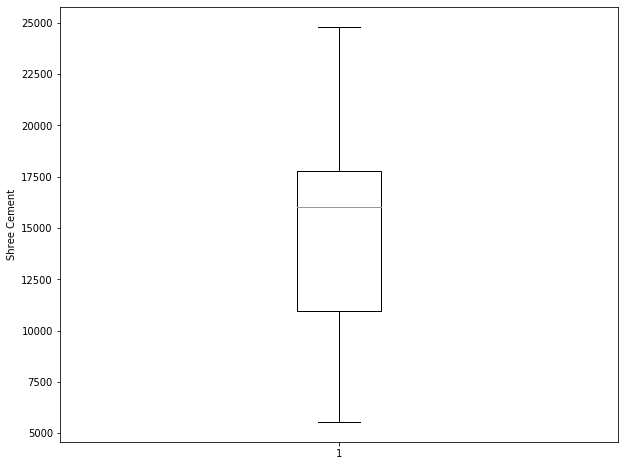

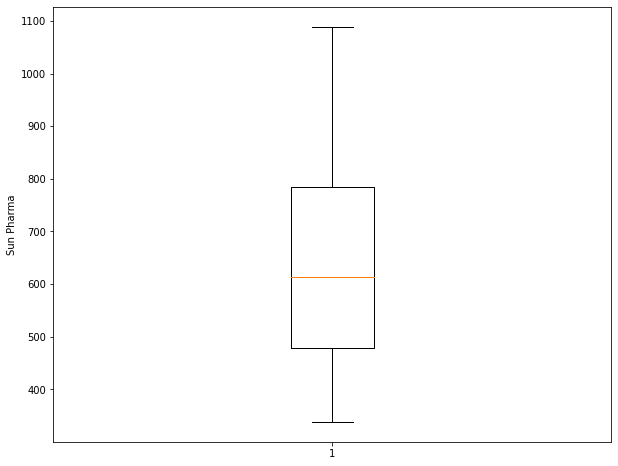

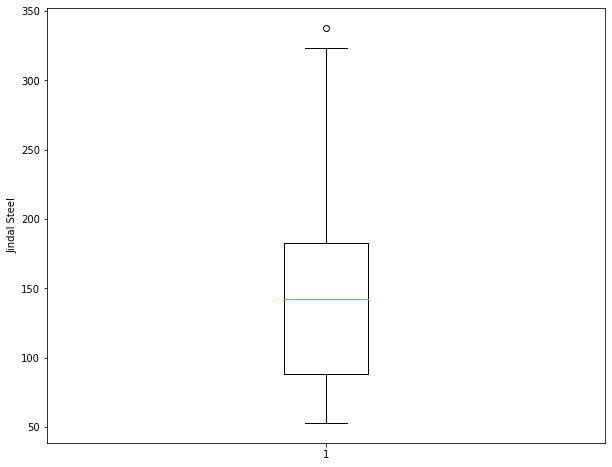

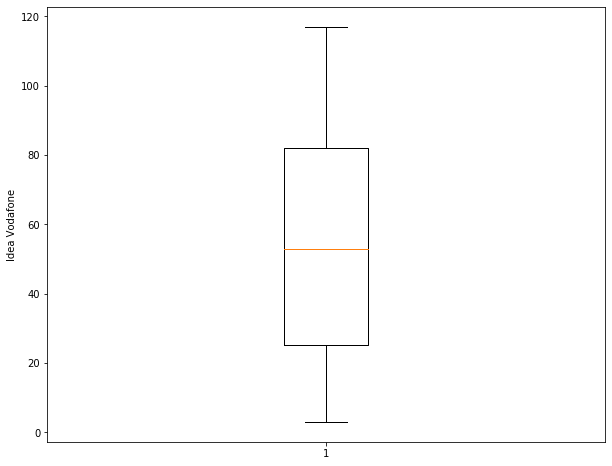

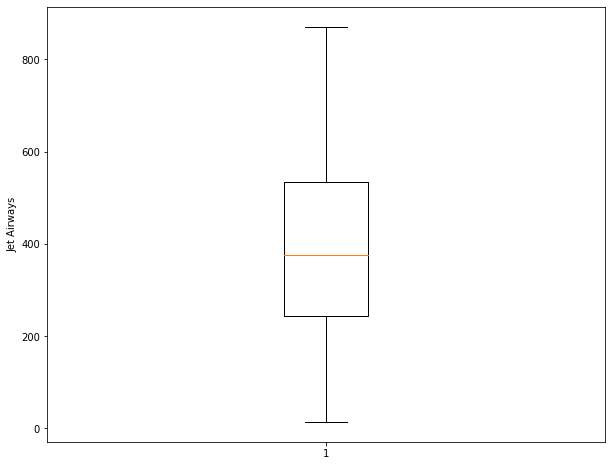

In [9]:
for i in range(len(col)):
    plt.figure(figsize=(10,8))
    plt.boxplot(stock_prices[col[i]])
    plt.ylabel(col[i])
    plt.title('')

# Q2 Calculate Returns

In [10]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1)

In [11]:
stock_returns.shape

(314, 10)

In [12]:
stock_returns.head()

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [13]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian Hotel           0.000266
Mahindra & Mahindra   -0.001506
Axis Bank              0.001167
SAIL                  -0.003463
Shree Cement           0.003681
Sun Pharma            -0.001455
Jindal Steel          -0.004123
Idea Vodafone         -0.010608
Jet Airways           -0.009548
dtype: float64

In [14]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian Hotel           0.047131
Mahindra & Mahindra    0.040169
Axis Bank              0.045828
SAIL                   0.062188
Shree Cement           0.039917
Sun Pharma             0.045033
Jindal Steel           0.075108
Idea Vodafone          0.104315
Jet Airways            0.097972
dtype: float64

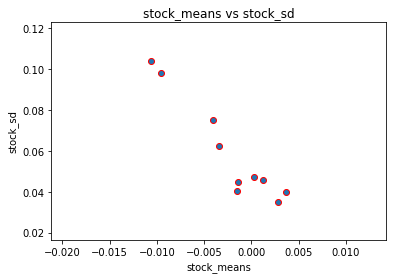

In [15]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
#plt.annotate("Point 1", (1, 4))
plt.title('stock_means vs stock_sd')
plt.show()

In [43]:
col=stock_returns.columns

In [44]:
col

Index(['Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank', 'SAIL',
       'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways'],
      dtype='object')

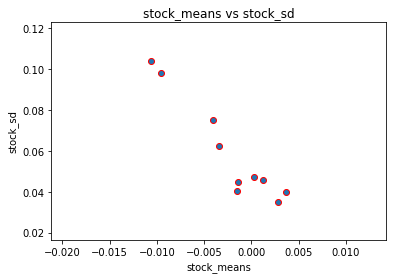

In [25]:
plt.scatter(stock_means, stock_sd, edgecolors='r')
plt.xlabel('stock_means')
plt.ylabel('stock_sd')
    
plt.title('stock_means vs stock_sd')
plt.annotate("Infosys", (stock_means[],stock_sd)
    #plt.hold(True)
plt.show()
    

    
    
    



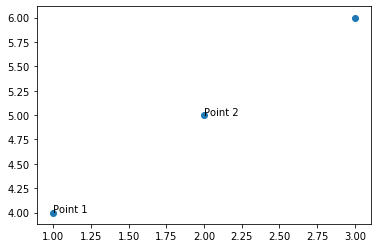

In [27]:

plt.scatter([1, 2, 3], [4, 5, 6])
plt.annotate("Point 1", (1, 4))
plt.annotate("Point 2", (2, 5))
plt.show()


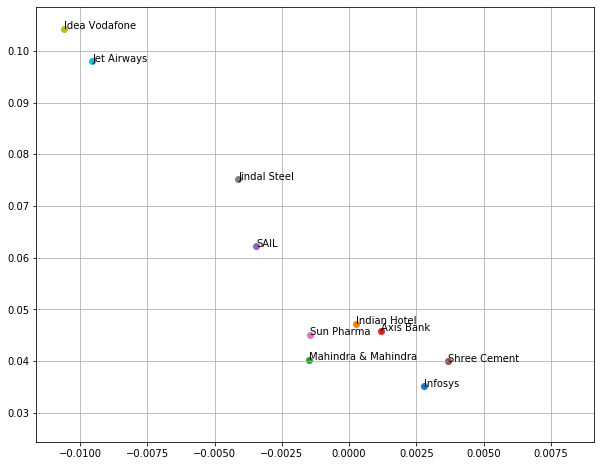

In [42]:
plt.figure(figsize = (10, 8))
plt.grid()
for i in range(len(col)):
    plt.scatter(stock_means[col[i]], stock_sd[col[i]])
    plt.annotate(col[i], (stock_means[col[i]], stock_sd[col[i]]))
    

    

